### Laboratorio 3 
#### Stefano Aragoni, Carol Arevalo

--------


1. Análisis Exploratorio:
Describir la serie de tiempo y visualizarla

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from darts import TimeSeries

# Cargar los datos
dataframe = pd.read_csv("data/monthly-car-sales.csv", delimiter=",")

# Se imprime el dataframe
dataframe.head(10)

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
5,1960-06,13791
6,1960-07,9498
7,1960-08,8251
8,1960-09,7049
9,1960-10,9545


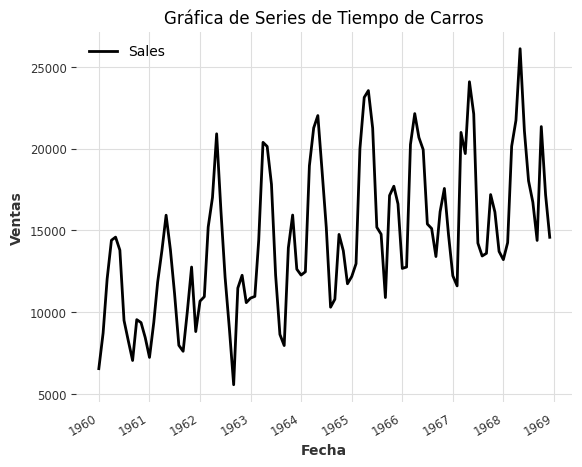

In [2]:
# Cargar la serie de tiempo
ts = TimeSeries.from_dataframe(dataframe, 'Month', 'Sales')

# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Carros")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas")
plt.show()

In [3]:
# Entrenamiento y validación
train, val = ts[:-36], ts[-36:]

Promedios:
• Aplicar métodos de promedios y comparar los resultados con el conjunto original

a.  NaiveMovingAverage

The `CatBoost` module could not be imported. To enable CatBoost support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md


RMSE = 3774.21
MAE = 3205.53


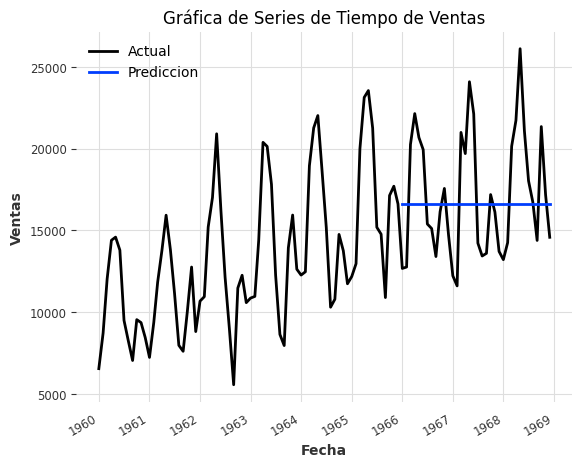

In [4]:
from darts.models import NaiveMovingAverage
from darts.metrics import rmse, mae

# Crear el modelo
model = NaiveMovingAverage()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Ventas")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas")
ax.legend()
plt.show()

2. NaiveMean

RMSE = 5380.43
MAE = 4100.86


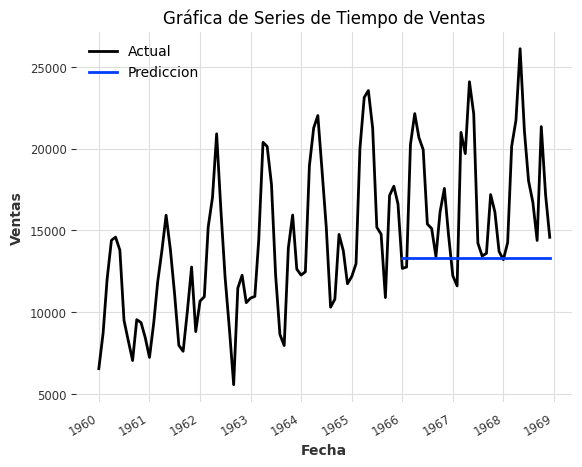

In [5]:
from darts.models import NaiveMean

# Crear el modelo
model = NaiveMean()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Ventas")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas")
ax.legend()
plt.show()

SARIMA:
• Identificar parámetros y ajustar un modelo SARIMA

RMSE = 6205.13
MAE = 5034.26


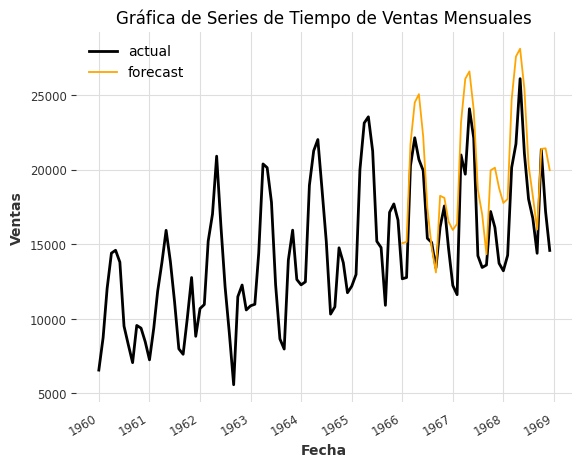

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Crear el modelo SARIMA
order = (1, 1, 1)  # Estos son los parámetros p, d, q para el modelo ARIMA
seasonal_order = (1, 1, 1, 12)  # Estos son los parámetros P, D, Q, S para la parte estacional
model_sarima = SARIMAX(train.values(), order=order, seasonal_order=seasonal_order)
model_sarima = model_sarima.fit(disp=False)

# Predecir los valores
prediction = model_sarima.forecast(steps=len(val))

# Calcular RMSE y MAE manualmente
rmse_val = np.sqrt(np.mean((val.values() - prediction) ** 2))
mae_val = np.mean(np.abs(val.values() - prediction))

print('RMSE = {:.2f}'.format(rmse_val))
print('MAE = {:.2f}'.format(mae_val))

# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='actual', ax=ax)
ax.plot(val.time_index, prediction, label='forecast', color='orange')

ax.set_title("Gráfica de Series de Tiempo de Ventas Mensuales")
ax.set_xlabel("Fecha")
ax.set_ylabel("Ventas")
ax.legend()
plt.show()

Alisamiento Exponencial:
• Aplicar diferentes métodos de alisamiento exponencial y comparar.

Modelo 1: Single exponential smoothing

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


RMSE = 3773.40
MAE = 3205.53


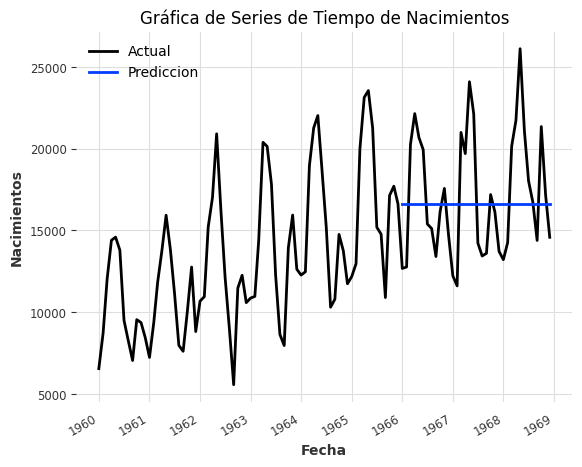

In [7]:
from darts.models import ExponentialSmoothing

# Crear el modelo SIMPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend=None,               # No hay tendencia
    seasonal=None,            # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))    

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

Método 2: Double Exponential Smoothing

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


RMSE = 4864.18
MAE = 3789.76


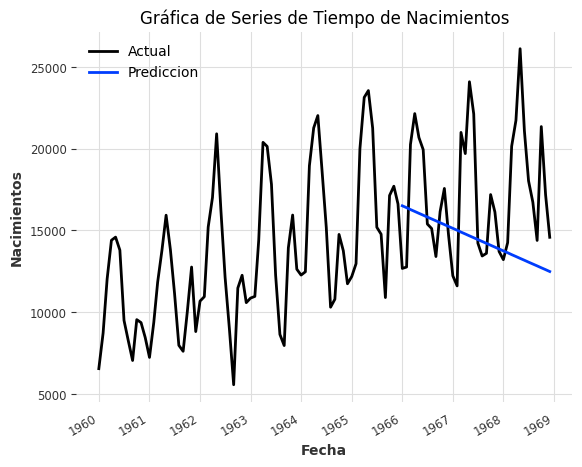

In [8]:
from darts.utils.utils import ModelMode, SeasonalityMode

# Crear el modelo DOUBLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,              # Sí hay tendencia
    seasonal=None,                          # No hay estacionalidad
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

Método 3: Triple Exponential Smoothing (Holt-Winters' exponential smoothing)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


RMSE = 5938.26
MAE = 5057.76


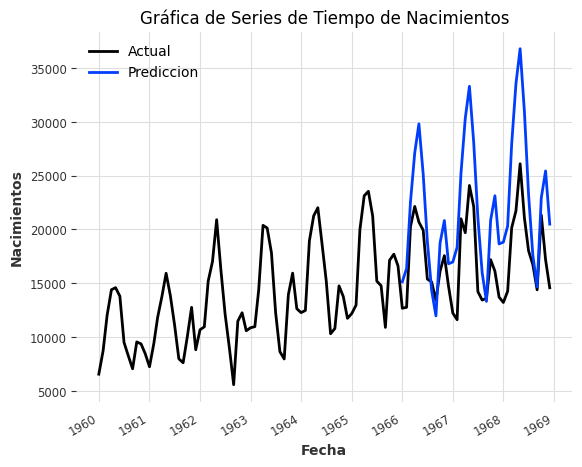

In [9]:
# Crear el modelo TRIPLE EXPONENTIAL SMOOTHING
model = ExponentialSmoothing(
    trend= ModelMode.ADDITIVE,                  # Sí hay tendencia
    seasonal=SeasonalityMode.MULTIPLICATIVE     # Sí hay estacionalidad
    #seasonal_periods                           # Inferido automáticamente
)

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))      # 36 es el 10% de los datos

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax, low_quantile=0.05, high_quantile=0.95)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

Prophet:
• Utilizar Prophet para modelar la serie de tiempo.

18:53:12 - cmdstanpy - INFO - Chain [1] start processing
18:53:13 - cmdstanpy - INFO - Chain [1] done processing


RMSE = 3108.93
MAE = 2700.24


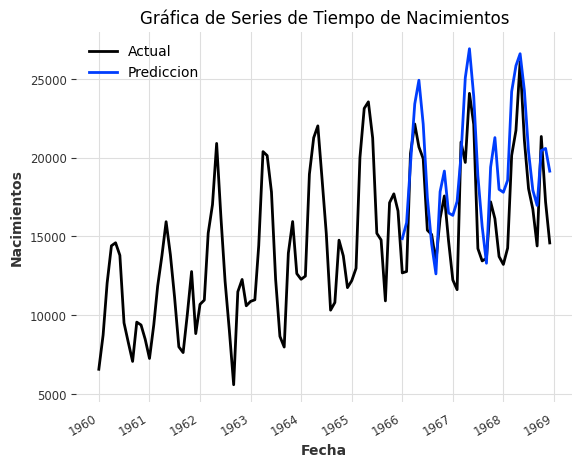

In [10]:
from darts.models.forecasting.prophet_model import Prophet

# Crear el modelo
model = Prophet()

# Entrenar el modelo
model.fit(train)

# Predecir los valores
prediction = model.predict(len(val))     

# Error RMSE, MAE
print('RMSE = {:.2f}'.format(rmse(val, prediction)))
print('MAE = {:.2f}'.format(mae(val, prediction)))


# Crear la gráfica de serie de tiempo
fig, ax = plt.subplots()
ts.plot(label='Actual', ax=ax)
prediction.plot(label='Prediccion', ax=ax)

ax.set_title("Gráfica de Series de Tiempo de Nacimientos")
ax.set_xlabel("Fecha")
ax.set_ylabel("Nacimientos")
ax.legend()
plt.show()

Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo

In [11]:
from darts.metrics import mape
from darts.models import RNNModel, NBEATSModel

model = RNNModel(
    model='LSTM',  # Puedes elegir entre 'LSTM' o 'GRU'
    input_chunk_length=12,
    output_chunk_length=1,
    hidden_size=50,
    n_rnn_layers=2,
    dropout=0.2,
    batch_size=16,
    n_epochs=100,
    optimizer_kwargs={'lr': 1e-3},
    model_name='temperature_rnn'
)

model.fit(train, verbose=True)

preds = model.predict(n=len(val))

error = mape(val, preds)
print(f"Error MAPE en el conjunto de validación: {error:.2f}%")

plt.figure(figsize=(12, 6))
val.plot(label='Datos de Validación')
preds.plot(label='Predicciones', lw=2)
plt.title("Predicciones vs. Datos de Validación")
plt.legend()
plt.show()




ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
ValueError: Invalid model creation parameters. Model `RNNModel` has no args/kwargs `['hidden_size']`


ValueError: Invalid model creation parameters. Model `RNNModel` has no args/kwargs `['hidden_size']`